BACKTEST -----------------------
WR: 0.61% | ROI: 11.78% | Drawdown: -5.58%
MedGain: 0.83 | MedLoss: -1.00 | EV: 0.12

REALIDADE -----------------------
WR: 58.04% | ROI: 5.64% | Drawdown: -7.13%
MedGain: 0.82 | MedLoss: -1.00 | EV: 0.06

Profit: 8.06 | Entradas: 143
Dias: 37 (48 totais)


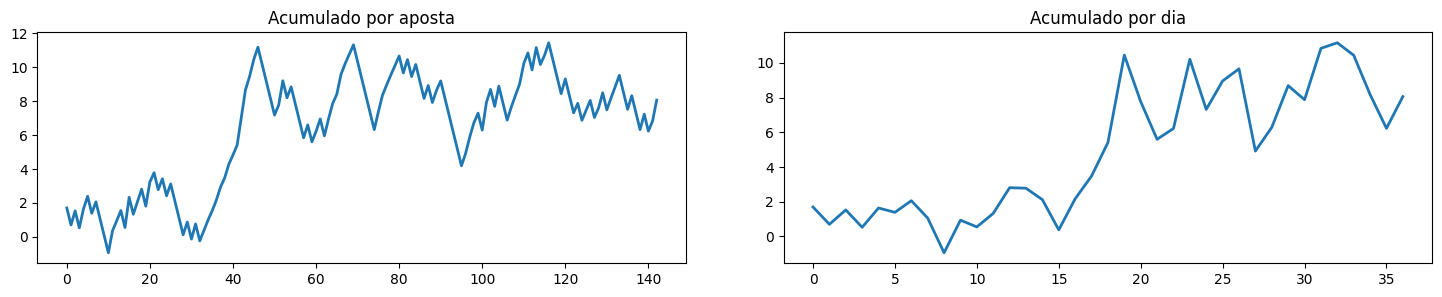


Por Mês --------------------------------------


,Date,Total_Profit,Qtd_Games,ROI
0,2023-11-30,5.41,42,0.13
1,2023-12-31,2.65,101,0.03



Dias --------------------------------------


,Date,Total_Profit,Qtd_Games,Acumulado
0,2023-11-01,1.70,1,1.70
1,2023-11-04,-1.00,1,0.70
2,2023-11-06,0.83,1,1.53
3,2023-11-07,-1.00,1,0.53
4,2023-11-11,1.11,1,1.64
5,2023-11-12,-0.25,2,1.39
6,2023-11-14,0.67,1,2.06
7,2023-11-16,-1.00,1,1.06
8,2023-11-17,-2.00,2,-0.94
9,2023-11-19,1.88,2,0.94



Jogos -------------------------------------


,Date,Home,Away,Home_Pts,Away_Pts,Odds_H,Resultado,Profit,Acumulado
0,2023-11-01,Toronto Raptors,Milwaukee Bucks,130,111,2.70,green,1.70,1.70
1,2023-11-04,New Orleans Pelicans,Atlanta Hawks,105,123,1.74,red,-1.00,0.70
2,2023-11-06,Miami Heat,Los Angeles Lakers,108,107,1.83,green,0.83,1.53
3,2023-11-07,Jilin,Shanghai,107,116,2.04,red,-1.00,0.53
4,2023-11-11,Sacramento Kings,Oklahoma City Thunder,105,98,2.11,green,1.11,1.64
5,2023-11-12,Sun Rockers Shibuya,Yokohama,81,69,1.75,green,0.75,2.39
6,2023-11-12,Shandong,Shenzhen,102,103,2.43,red,-1.00,1.39
7,2023-11-14,Brooklyn Nets,Orlando Magic,124,104,1.67,green,0.67,2.06
8,2023-11-16,Fujian,Shanxi Zhongyu,104,136,1.73,red,-1.00,1.06
9,2023-11-17,Chicago Bulls,Orlando Magic,97,103,1.97,red,-1.00,0.06


In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import pandas as pd; pd.set_option('display.max_rows', None)
import glob
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import sys
sys.path.append('scripts/')
from Acompanhamento import *
METODO = 'back_home_v3'
TARGET = 'Back_Home'
ODDS = 'Odds_H'
SPREAD = 1
STAKE = 1


# Dados de backtest
wr = 0.61
roi = 11.78
drawdown = -5.58
med_gain = 0.83
med_loss = -1
ev = 0.12
df_all = pd.DataFrame()
dias = glob.glob('apostas_do_dia/*')


df_hist = pd.read_excel('data/metodos_hist/v3_back_home.xlsx')
df_hist['Date'] = pd.to_datetime(df_hist['Date']).dt.date
df_all = pd.DataFrame()
dias = glob.glob('apostas_do_dia/*')

for dia in dias:
    dia = dia.split('\\')[1]
    dia = dia.split('.')[0]
    caminho = glob.glob(f'apostas_do_dia/{dia}/*{METODO}*')
    if len(caminho) == 0:
        continue
    caminho = caminho[0]
    df = pd.read_csv(caminho)
    df_all = pd.concat([df_all, df])

temp = pd.read_csv('data/Entire_Season.csv')
df_all = pd.merge(df_all, temp[['Date', 'Home', 'Away', 'Home_Pts', 'Away_Pts']], on=['Date', 'Home', 'Away'], how='left')
df_all = df_all.dropna(subset=['Home_Pts', 'Away_Pts'])
df_all = pd.concat([df_hist, df_all])
df_all.reset_index(drop=True, inplace=True)

df_all.loc[(df_all['Home_Pts'] > df_all['Away_Pts']), TARGET] = 1
df_all.loc[(df_all['Home_Pts'] <= df_all['Away_Pts']), TARGET] = 0

df_all['Home_Pts'] = df_all['Home_Pts'].astype(int)
df_all['Away_Pts'] = df_all['Away_Pts'].astype(int)

df_all[ODDS] = df_all[ODDS] * SPREAD
df_all[ODDS] = df_all[ODDS].round(2)

df_all.loc[(df_all[TARGET] == 0), 'Profit'] = - STAKE
df_all.loc[(df_all[TARGET] == 1), 'Profit'] = ((df_all[ODDS] * SPREAD) - 1) * STAKE
df_all['Profit'] = df_all['Profit'].round(2)

df_all['Date'] = pd.to_datetime(df_all['Date'])
df_30D = df_all.groupby(pd.Grouper(key='Date', freq='30D')).agg({'PL_BF_Predictions': 'sum', 'Home': 'count'}).reset_index()
df_30D['PL_BF_Predictions'] = df_30D['PL_BF_Predictions'].astype(float)
df_30D['PL_BF_Predictions'] = df_30D['PL_BF_Predictions'].round(2)
df_30D['ROI'] = df_30D['PL_BF_Predictions'] / df_30D['Home']
df_30D['ROI'] = df_30D['ROI'].round(2)

print('BACKTEST -----------------------')
print(f'WR: {wr:.2f}% | ROI: {roi:.2f}% | Drawdown: {drawdown:.2f}%')
print(f'MedGain: {med_gain:.2f} | MedLoss: {med_loss:.2f} | EV: {ev:.2f}')

print('\nREALIDADE -----------------------')
df_odds, df_by_day = get_results(df_all, TARGET, ODDS)